# Analysis of Singapore political parties' manifesto

This is my attempt to scrape and analyse the manifestos of the political parties contesting in the 2020 Singapore General Election

## Importing the relevant libraries and defining functions

In [8]:
import pandas as pd 

import io

from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
            
        text = fake_file_handle.getvalue()
    
    # close open handles
    converter.close()
    fake_file_handle.close()
    
    if text:
        return text
    
from nltk.corpus import stopwords
import string

def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

## PAP Manifesto

Extracting the text from the pdf

In [5]:
pdf_manifesto = 'pap-manifesto-2020-our-lives-our-jobs-our-future.pdf'

if __name__ == '__main__':
    manifesto = extract_text_from_pdf(pdf_manifesto)

Processing the text by removing punctuation, stopwords from the nltk corpus

In [ ]:
message = ' '.join(text_process(manifesto)).lower()

A word cloud of the manifesto

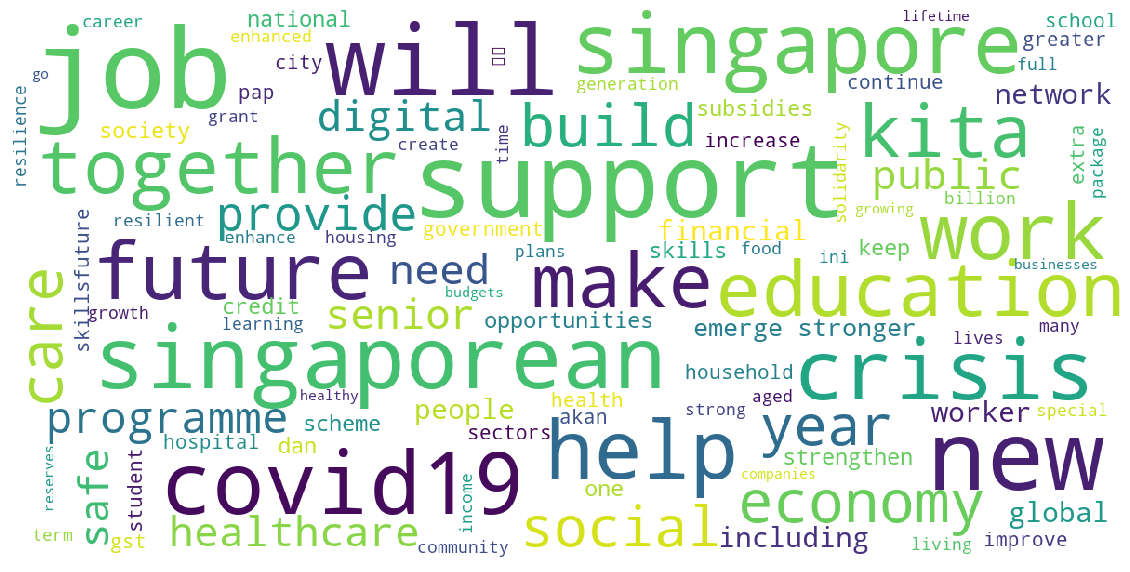

In [11]:
show_wordcloud(message)

Counting the words and putting it into a dataframe
I will only be including words that are not unique i.e. have been mentioned more than once

In [6]:
data = word_count(message)

df = pd.DataFrame(data.items(),columns =['word','counter']) 
words = df.sort_values(by=['counter'], ascending= False)
morethan2 = words['counter']>1
words_morethan2 = words[morethan2]

Sample of the data

In [7]:
words_morethan2.head(20)

,word,counter
23,support,19
317,will·,19
36,new,19
1,jobs,18
286,·,17
54,covid19,15
96,help,13
142,singaporeans,13
9,crisis,13
40,singapore,12


A word cloud of the manifesto

## Worker's Party manifesto

Extracting text from pdf

In [12]:
pdf_manifesto = 'The+Workers+Party+Manifesto+2020.pdf'

if __name__ == '__main__':
    manifesto = extract_text_from_pdf(pdf_manifesto)

Processing the text by removing punctuation, stopwords from the nltk corpus

In [13]:
message = ' '.join(text_process(manifesto)).lower()

A word cloud of the manifesto

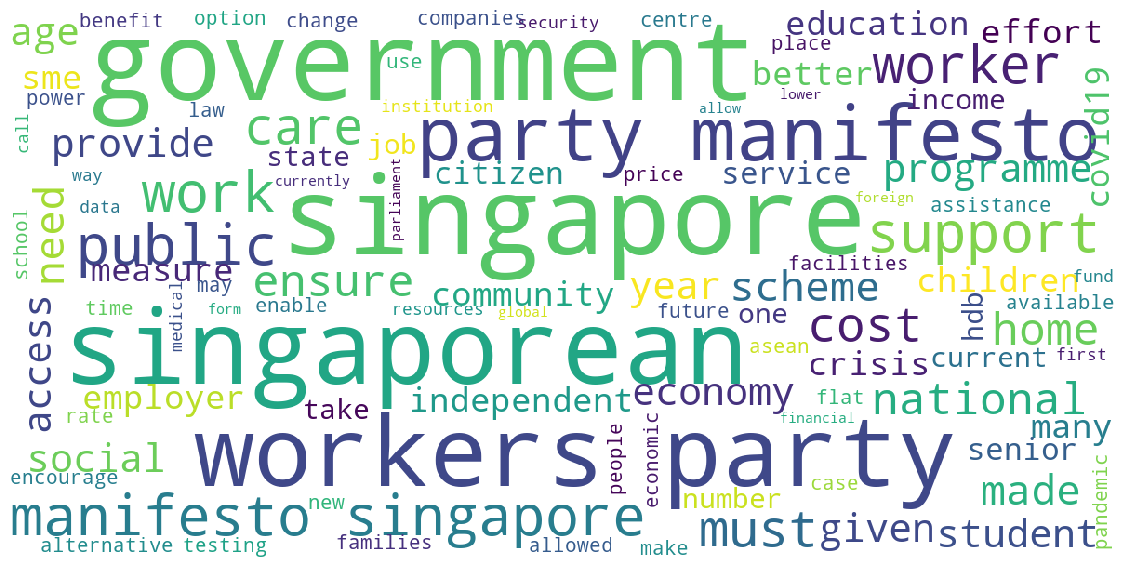

In [14]:
show_wordcloud(message)

Counting the words and putting it into a dataframe
I will only be including words that are not unique i.e. have been mentioned more than once

In [15]:
data = word_count(message)

df = pd.DataFrame(data.items(),columns =['word','counter']) 
words = df.sort_values(by=['counter'], ascending= False)
morethan2 = words['counter']>1
words_morethan2 = words[morethan2]

Sample of the data

In [16]:
words_morethan2.head(20)

,word,counter
4,singapore,98
219,government,57
1,party,54
227,would,46
8,singaporeans,44
0,workers’,43
3,2020,43
115,public,43
2,manifesto,43
505,also,41
